## HOTELS BOOKING ANALYSIS.

### Some Assumptions
#### 1. No unusual occurrences between 2015 and 2017 will have a substancial impact on the data used. 
#### 2. The given information is current and used for analyzing for hotels possible plans in efficient manner. 
#### 3 There are no unanticipated to the hotels employing any advised technique. 
#### 4 The hotels are not currently using any of the suggested solutions. 
#### 5 The biggest factor that effected the income of hotels is booking cancellation. 
#### 6 Client make hotel reservations the same year they make hotel cancellation.



### Research Question
#### 1. What are the variables that affect the hotel reservation cancellation?
#### 2 How can we make  hotel reservation cancellation better ?
#### 3.How hotels should controll those variables which cause them reservation cancellation?

### Hypothesis
#### 1. More cancellation occur when prices are higher.
#### 2. When there are long waiting list , customers cancel more frequently.
#### 3.The majority of client are coming from offline travel agency for booking there resrvation.

###  Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

###  Loding the Dataset

In [2]:
hb=pd.read_csv('hotel_booking.csv')

###  Exploratory Data Analysis and Data Cleaning

In [3]:
hb.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [4]:
hb.reservation_status_date

0         2015-07-01
1         2015-07-01
2         2015-07-02
3         2015-07-02
4         2015-07-03
             ...    
119385    2017-09-06
119386    2017-09-07
119387    2017-09-07
119388    2017-09-07
119389    2017-09-07
Name: reservation_status_date, Length: 119390, dtype: object

In [5]:
hb.shape

(119390, 36)

In [6]:
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [7]:
hb.drop(['name','email','phone-number','credit_card'],axis=1 , inplace=True)

In [8]:
hb.shape

(119390, 32)

In [9]:
hb.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [10]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [11]:
hb['reservation_status_date']=pd.to_datetime(hb['reservation_status_date'])

In [12]:
hb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [13]:
hb.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [14]:
for col in  hb.describe(include='object'):
    print(col)
    print(hb[col].unique())
    print ('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [15]:
hb.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [16]:
hb.drop(['agent','company'],axis=1 , inplace=True)

In [17]:
hb.dropna(inplace=True)

In [18]:
hb.shape

(118898, 30)

In [19]:
hb.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [20]:
hb.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<AxesSubplot:>

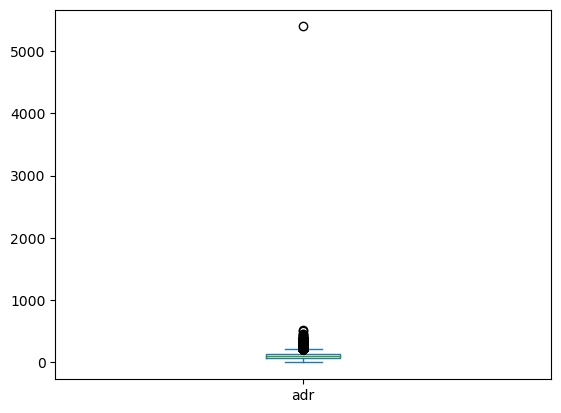

In [21]:
hb.adr.plot(kind='box')  # To Check the outlier in adr( avg daily rate)

In [22]:
hb= hb[hb.adr<5000]    #Removing outliers

<AxesSubplot:>

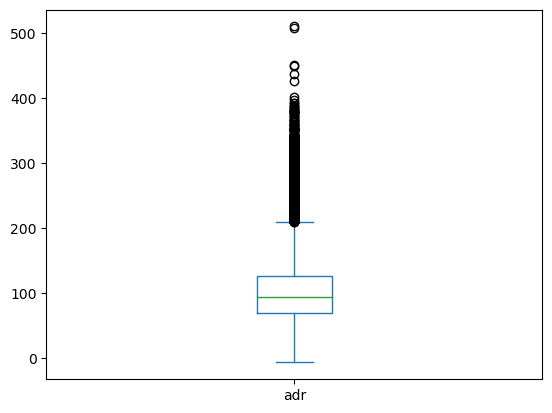

In [23]:
hb.adr.plot(kind='box')      #after Removing outliers

In [24]:
hb.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000


### Data Analysis and Visualizations

In [25]:
hb.is_canceled.value_counts()

0    74745
1    44152
Name: is_canceled, dtype: int64

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64
0    74745
1    44152
Name: is_canceled, dtype: int64


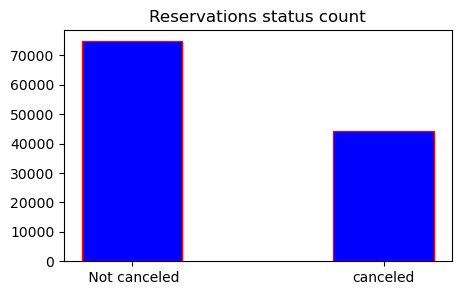

In [26]:
canceled_perc= hb.is_canceled.value_counts(normalize=True)
count_canceled=hb.is_canceled.value_counts()
print(canceled_perc)
print(count_canceled)

plt.figure(figsize=(5,3))   
plt.title('Reservations status count')
plt.bar([' Not canceled','canceled'], hb.is_canceled.value_counts(),edgecolor= 'r', color='b',width=0.4)
plt.show()

In [27]:
resort_hotel = hb[hb.hotel == 'Resort Hotel'].hotel.count()
resort_hotel

39596

In [28]:
resort_hotel= hb[hb.hotel == 'Resort Hotel']  
resort_hotel['is_canceled'].value_counts()

0    28519
1    11077
Name: is_canceled, dtype: int64

In [29]:
#another way
resort_hotel= hb[hb.hotel == 'Resort Hotel']['is_canceled'].value_counts()   
resort_hotel

0    28519
1    11077
Name: is_canceled, dtype: int64

In [30]:
resort_hotel= hb[hb.hotel == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [31]:
city_hotel= hb[hb.hotel == 'City Hotel']
city_hotel['is_canceled'].value_counts()

0    46226
1    33075
Name: is_canceled, dtype: int64

In [32]:
city_hotel= hb[hb.hotel == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

###  Visualization  Representation of both Hotels

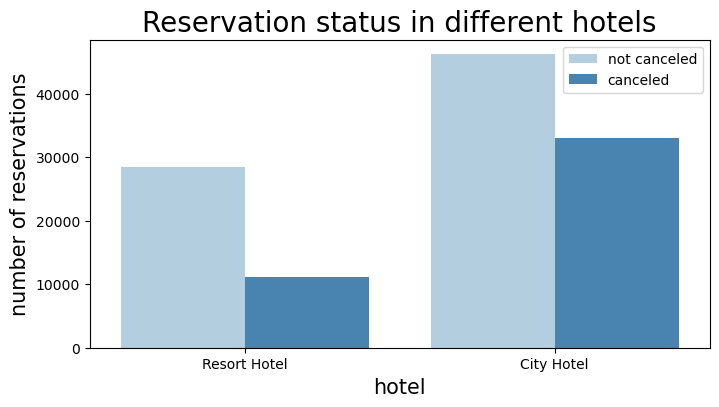

In [33]:
plt.figure(figsize=(8,4))
ax1= sns.countplot(x='hotel', hue='is_canceled',data= hb,palette='Blues')   
plt.title('Reservation status in different hotels',size=20)
plt.xlabel('hotel' ,size= 15)
plt.ylabel('number of reservations',size=15)              
plt.legend(['not canceled', 'canceled'])
plt.show()

###  Now we have to Check is there some effect of ADR on both the Hotels

In [34]:
resort_hotel= hb[hb.hotel == 'Resort Hotel']['is_canceled'].value_counts(normalize=True)
resort_hotel   

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [35]:
#another way
resort_hotel= hb[hb.hotel == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [36]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
resort_hotel

,adr
reservation_status_date,
2014-11-18,0.000000
2015-01-01,61.966667
2015-01-02,9.633750
2015-01-18,0.000000
2015-01-21,37.301209
...,...
2017-09-08,101.012500
2017-09-09,147.778333
2017-09-10,145.272500


In [37]:
city_hotel= hb[hb.hotel == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [38]:
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel

,adr
reservation_status_date,
2014-10-17,62.800000
2015-01-01,62.063158
2015-01-20,76.500000
2015-01-30,61.400000
2015-02-17,76.500000
...,...
2017-09-03,137.172600
2017-09-04,116.925385
2017-09-05,154.000000


In [39]:
resort_hotel=resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel=city_hotel.groupby('reservation_status_date')[['adr']].mean()

###  Visualization created on the basis of ADR for both city_hotel & resort_hotel

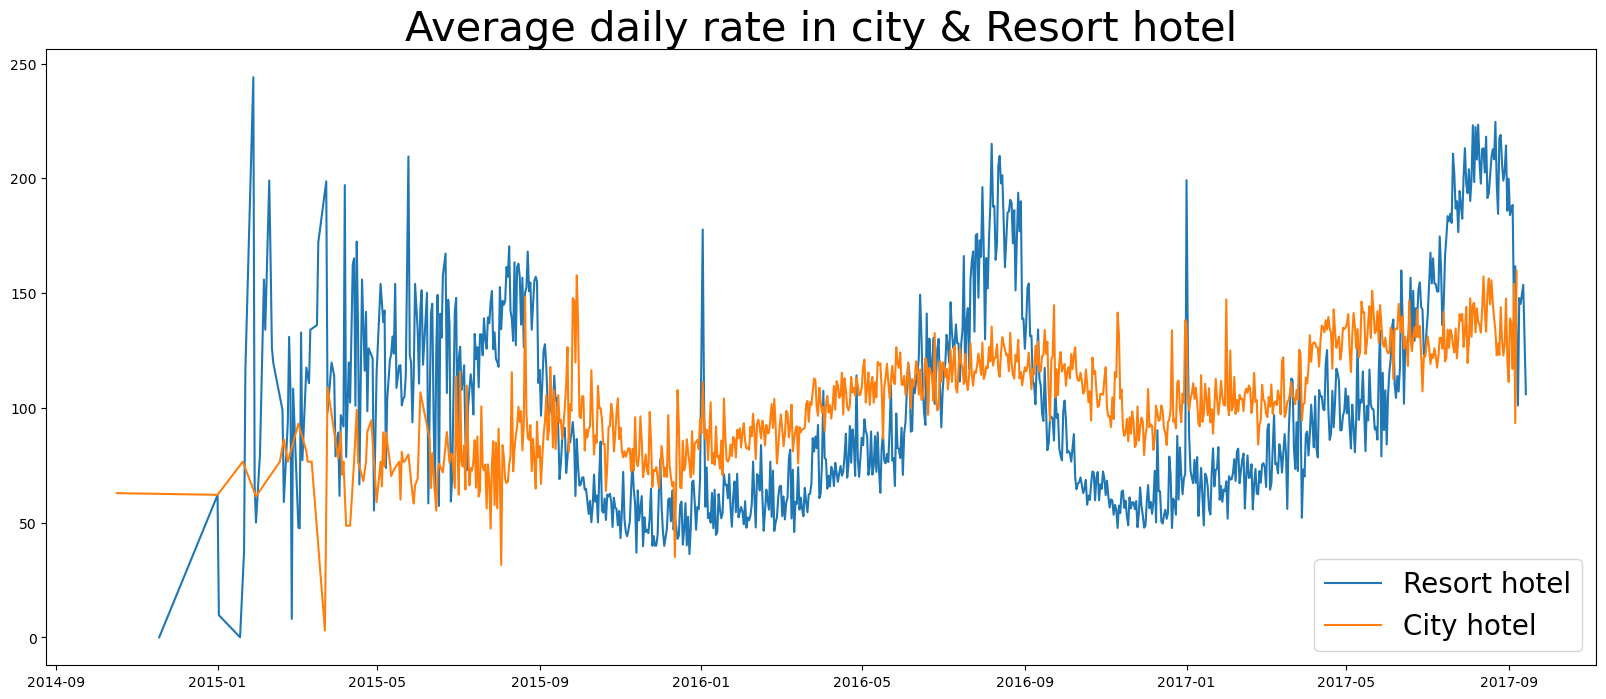

In [40]:
plt.figure(figsize=(20,8))
plt.title('Average daily rate in city & Resort hotel',fontsize=30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label='Resort hotel')  
plt.plot(city_hotel.index,city_hotel['adr'],label='City hotel')          
plt.legend(fontsize=20)
plt.show()

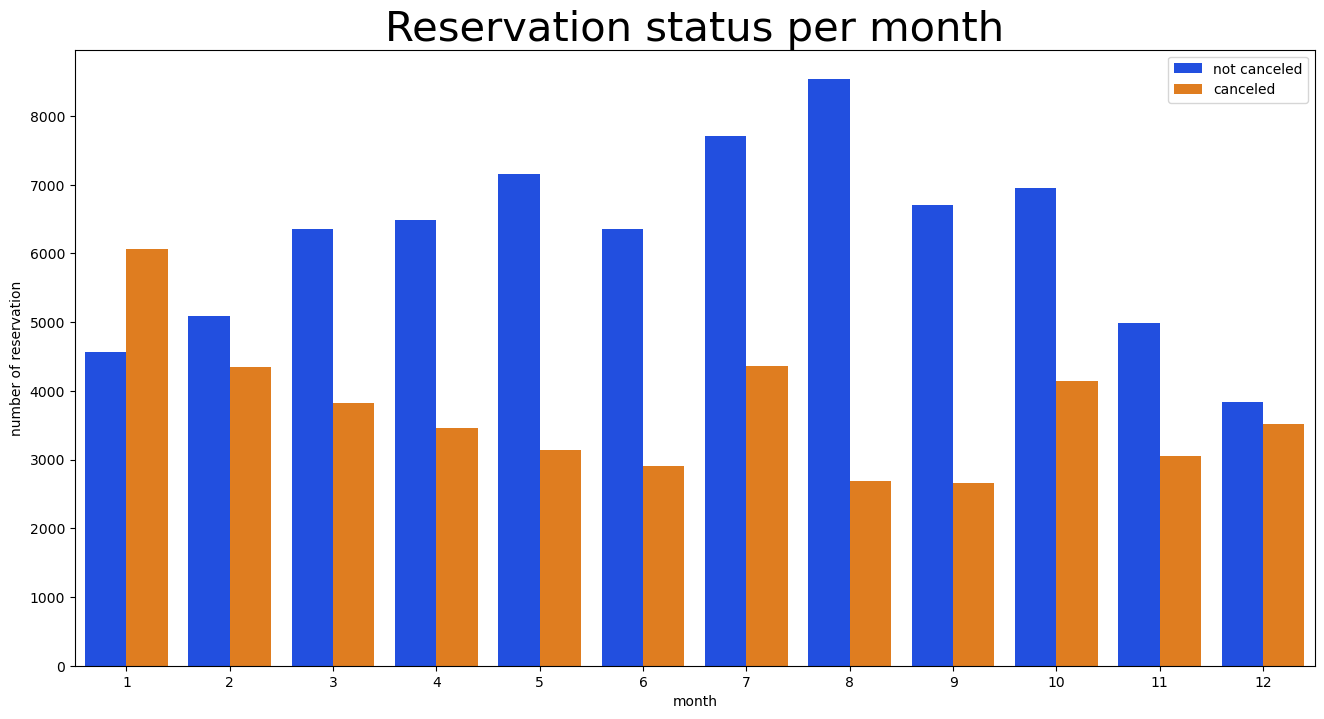

In [41]:
hb['month']= hb['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month', hue='is_canceled',data=hb,palette='bright')
plt.title('Reservation status per month',size=30)
plt.ylabel('number of reservation')
plt.xlabel('month')
plt.legend(['not canceled','canceled'])
plt.show()

###  From above graph we can see jan has maximum cancellation rate while Sept has manimum cancellation rate. 
### It may be because  jan has maximum ADR which result into maximum cancellation and while sept has min ADR so it has minimum cancellation. 
###  Let see from Graph of Avg Daily rate per 'month' for more clear clarification.

###  Avg Daily rate for Each Month

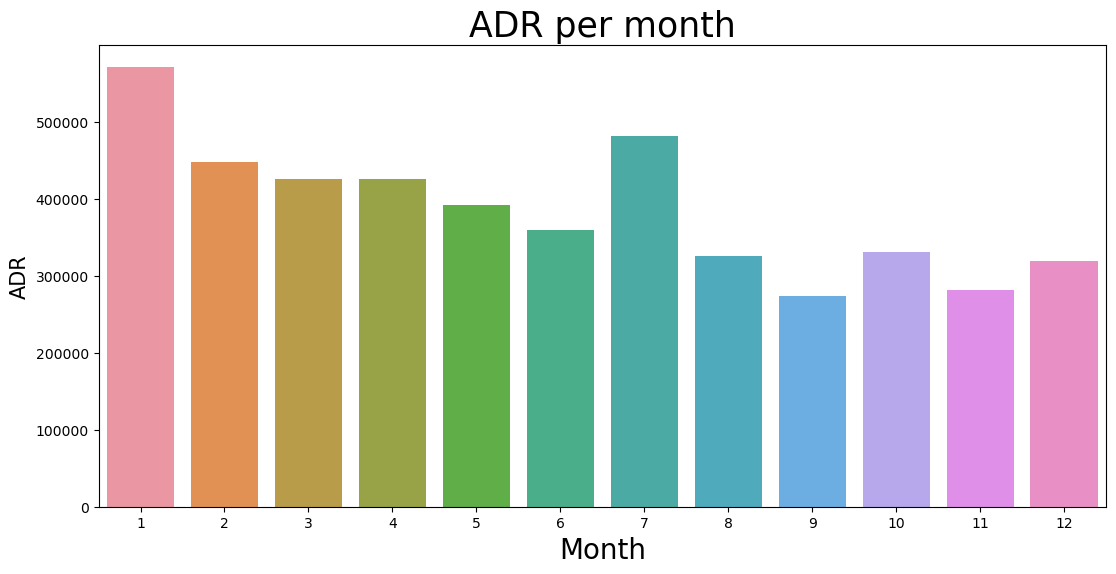

In [42]:
plt.figure(figsize=(13,6))
plt.title('ADR per month',fontsize=25)
sns.barplot('month','adr',data=hb[hb.is_canceled ==1].groupby('month')[['adr']].sum().reset_index())
plt.ylabel('ADR',size=15)
plt.xlabel('Month',size=20)                                                               
plt.show()


### From above graph it is proved that Avg daily rate has a very big impact on cancellation process ,as we can see from above both graph that JAN has maximum cancellation because it has maximum  'ADR' in that month , while SEPT has lowest cancellation because in that month it has lowest 'ADR '

###  Cancelation rate country wise

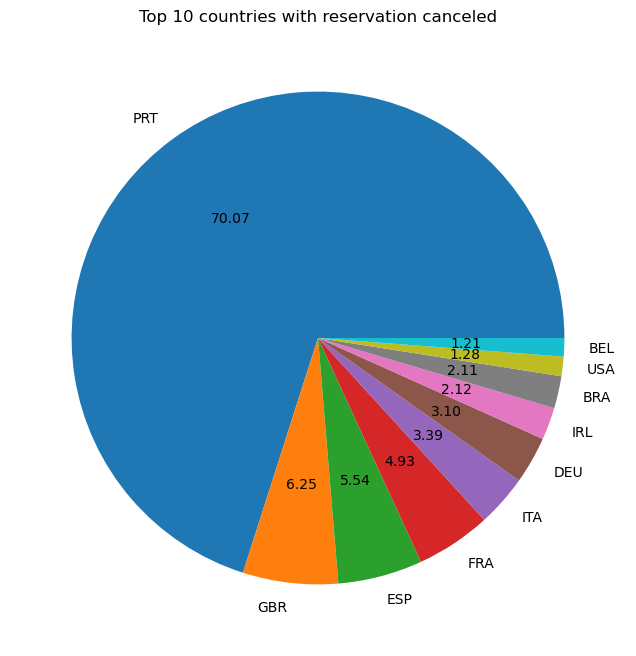

In [43]:
top_10_country= hb[hb.is_canceled==1].country.sort_values().value_counts().head(10)
plt.figure(figsize=(8,8))
plt.title('Top 10 countries with reservation canceled')
plt.pie(top_10_country, autopct= '%.2f',labels= top_10_country.index) 
plt.show()

### Market segment

In [44]:
hb.market_segment.value_counts()

Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

In [45]:
hb.market_segment.value_counts(normalize= True)

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

###  Market Segment wise reservation cancelation rate

In [46]:
hb[hb.is_canceled==1].market_segment.value_counts()


Online TA        20738
Groups           12097
Offline TA/TO     8277
Direct            1920
Corporate          978
Complementary       90
Aviation            52
Name: market_segment, dtype: int64

In [47]:
hb[hb.is_canceled==1].market_segment.value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

### Market Segment wise reservation cancellation/non cancellation   Plot

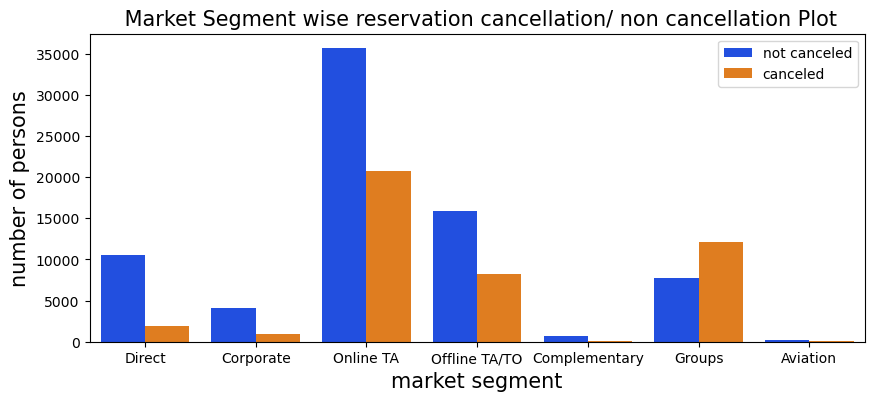

In [48]:
plt.figure(figsize=(10,4))
sns.countplot(x='market_segment', data=hb,hue='is_canceled',palette='bright')
plt.title(' Market Segment wise reservation cancellation/ non cancellation Plot',size=15)
plt.ylabel('number of persons',size=15)
plt.xlabel('market segment',size=15)
plt.legend(['not canceled','canceled']) 
plt.show()

In [49]:
hb[hb.is_canceled==1].market_segment.value_counts(normalize = True)

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

### From above insight it is clear that customer who booked through online travel agency has cancelled more bookings it may be happend beacause when customer visited the hotel physically it shows huge differences between the photos and facilities  as compare to shown on the hotel site. Customer feels disappointed and then they cancelled the booking immediately.

### Market Segment wise Avg rate for both Cancellation and Non cancelation

In [50]:
#Cancellation wise
avg_rate_cacellation_wise = hb[hb.is_canceled==1].groupby('market_segment').adr.mean()
avg_rate_cacellation_wise

market_segment
Aviation         102.490385
Complementary      1.731444
Corporate         79.435706
Direct           124.270245
Groups            80.981161
Offline TA/TO     94.395902
Online TA        122.944478
Name: adr, dtype: float64

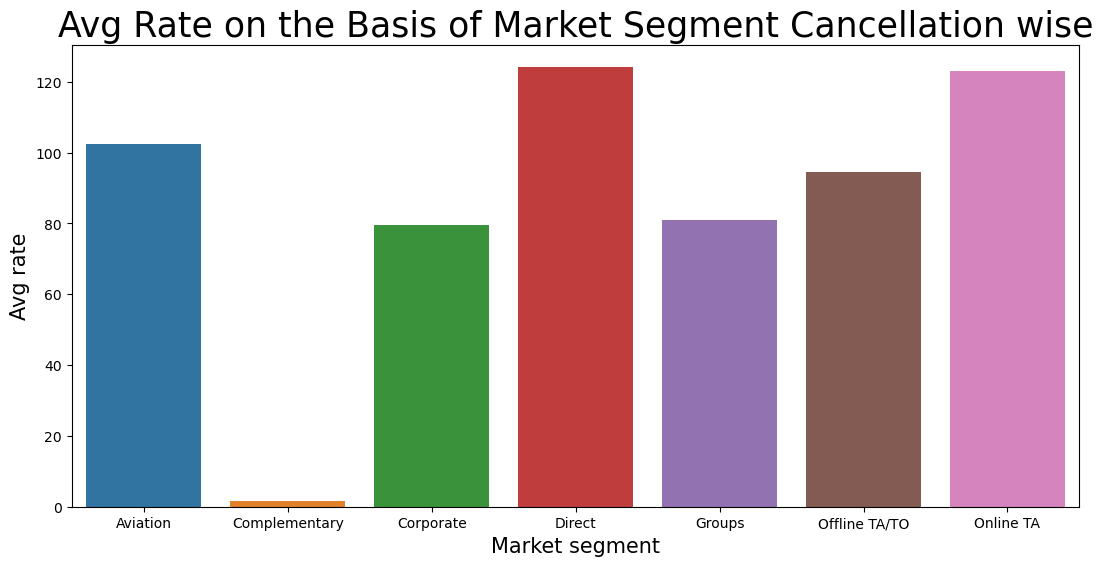

In [51]:
plt.figure(figsize=(13,6))
plt.title('Avg Rate on the Basis of Market Segment Cancellation wise',fontsize=25)
sns.barplot('market_segment','adr',data=hb[hb.is_canceled ==1].groupby('market_segment')[['adr']].mean().reset_index())
plt.ylabel('Avg rate',size=15)
plt.xlabel('Market segment',size=15)                                                          
plt.show()

In [52]:
#Non cancellation wise
avg_rate_non_cacellation_wise = hb[hb.is_canceled==0].groupby('market_segment').adr.mean()
avg_rate_non_cacellation_wise

market_segment
Aviation          99.482054
Complementary      3.088106
Corporate         68.118081
Direct           114.424089
Groups            77.089922
Offline TA/TO     83.469703
Online TA        113.944281
Name: adr, dtype: float64

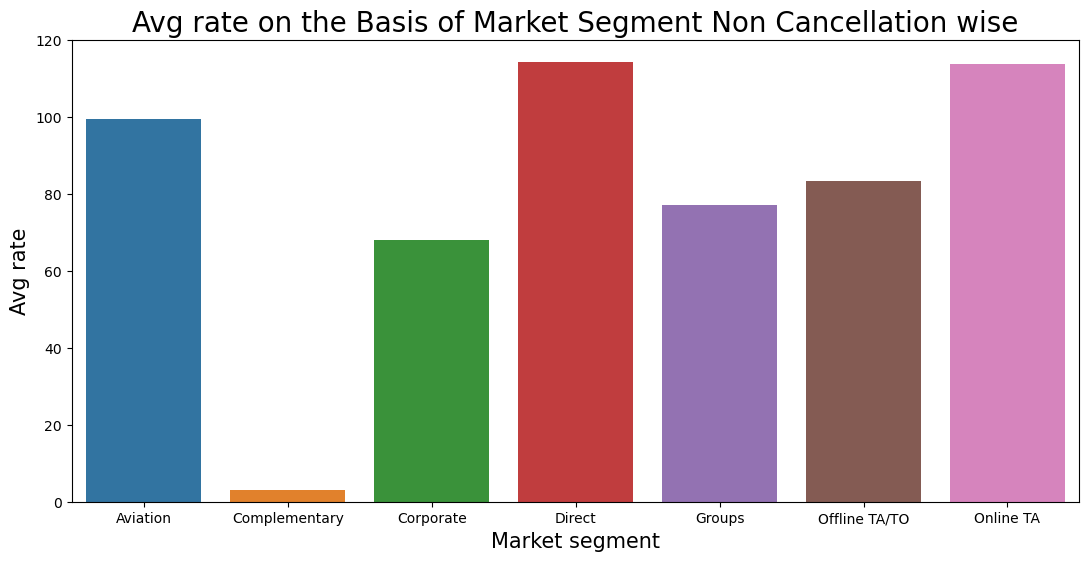

In [53]:
plt.figure(figsize=(13,6))
plt.title('Avg rate on the Basis of Market Segment Non Cancellation wise',fontsize=20)
sns.barplot('market_segment','adr',data=hb[hb.is_canceled ==0].groupby('market_segment')[['adr']].mean().reset_index())
plt.ylabel('Avg rate',size=15)
plt.xlabel('Market segment',size=15) 
plt.show()

###  Avg  rate for both Cancellation and Non cancellation On The Basis Of  Reservation_status_date  wise

In [54]:
#Cancellation wise
cancellation_adr= hb[hb.is_canceled==1].groupby('reservation_status_date').adr.mean()
cancellation_adr

reservation_status_date
2014-10-17     62.800000
2014-11-18      0.000000
2015-01-01     62.062779
2015-01-02      9.633750
2015-01-18      0.000000
                 ...    
2017-08-26    178.200000
2017-08-27    167.300000
2017-08-28     81.416667
2017-08-29    144.253333
2017-08-31    189.750000
Name: adr, Length: 902, dtype: float64

<AxesSubplot:title={'center':' Avg  rate for Cancellation On The Basis Of  Reservation_status_date  wise'}, xlabel='year', ylabel='avg rate'>

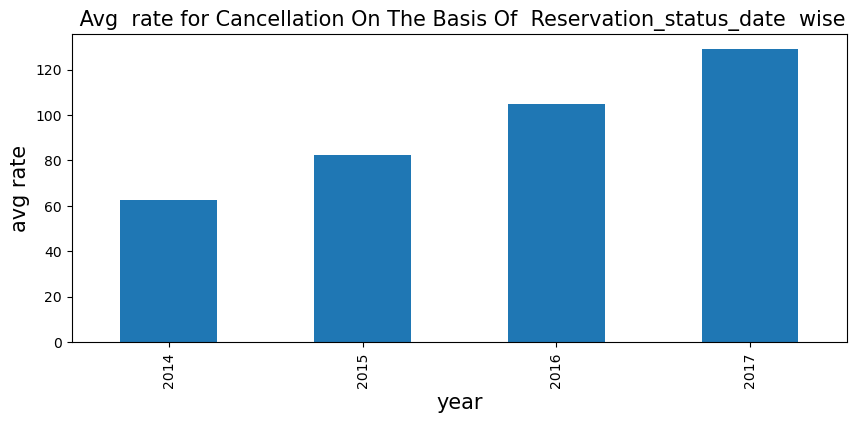

In [55]:
hb['year']= hb['reservation_status_date'].dt.year
plt.figure(figsize=(10,4))
plt.title(' Avg  rate for Cancellation On The Basis Of  Reservation_status_date  wise',size=15)
plt.ylabel('avg rate',size=15)
plt.xlabel('year',size=15)
hb[hb.is_canceled==1].groupby('year').adr.mean().plot.bar() 

In [56]:
# overall mean for cancellation
hb[hb.is_canceled==1].adr.mean()

104.91798536872318

In [57]:
#overall mean for non cancellation 
hb[hb.is_canceled==0].adr.mean()

100.21061796775419

In [58]:
#Non cancellation wise
non_cancellation_adr= hb[hb.is_canceled==0].groupby('reservation_status_date').adr.mean()
non_cancellation_adr

reservation_status_date
2015-07-01     31.650000
2015-07-02     95.924000
2015-07-03     97.645205
2015-07-04    110.480000
2015-07-05    100.308485
                 ...    
2017-09-08    101.012500
2017-09-09    147.778333
2017-09-10    145.272500
2017-09-12    153.570000
2017-09-14    105.930000
Name: adr, Length: 805, dtype: float64

<AxesSubplot:title={'center':' Avg  rate for Non Cancellation On The Basis Of  Reservation_status_date  wise'}, xlabel='year', ylabel='avg rate'>

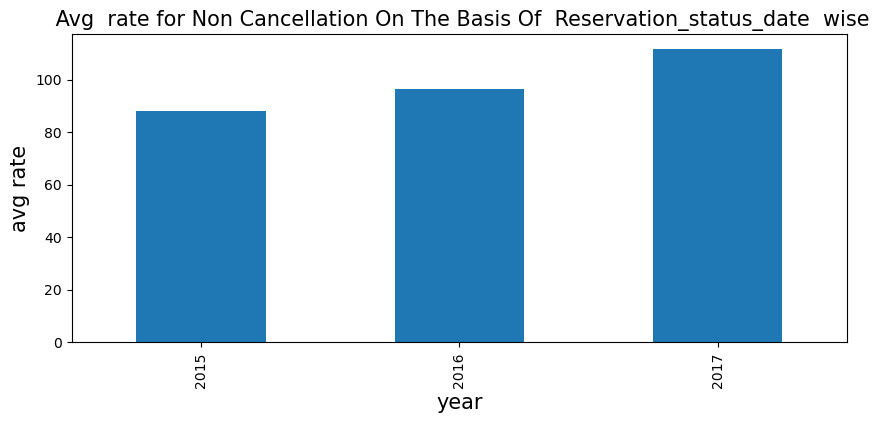

In [59]:
plt.figure(figsize=(10,4))
plt.title(' Avg  rate for Non Cancellation On The Basis Of  Reservation_status_date  wise',size=15)
plt.ylabel('avg rate',size=15)
plt.xlabel('year',size=15)
hb[hb.is_canceled==0].groupby('year').adr.mean().plot.bar() 

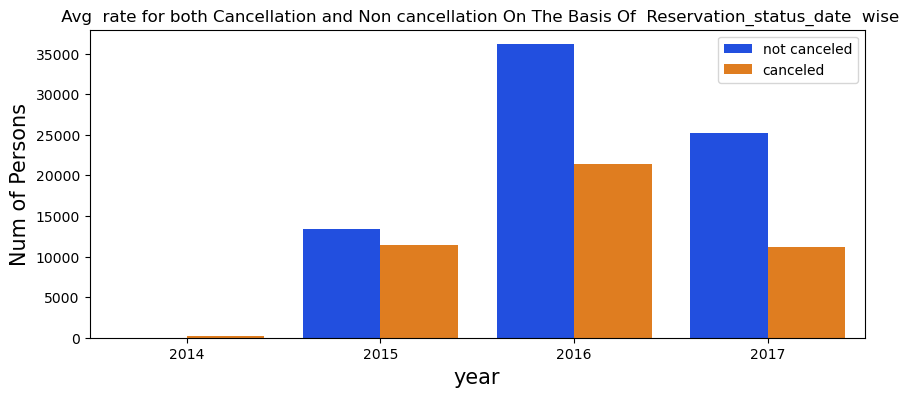

In [60]:
plt.figure(figsize=(10,4))
sns.countplot(x='year', data=hb,hue='is_canceled',palette='bright')
plt.title(' Avg  rate for both Cancellation and Non cancellation On The Basis Of  Reservation_status_date  wise',size=12)
plt.ylabel('Num of Persons',size=15)
plt.xlabel('year',size=15)
plt.legend(['not canceled','canceled']) 
plt.show()

## Some Suggestions to Hotels after Analyzing

### 1. From above analyzing the whole data set we reached in a conclusion that price play a very imprtant role in                the reservations process. Cancellation rises as price increases, hotel should work on the pricing strategies               and try to lower the amount as much possible based on there respectitive locations.

### 2. The cancellation percentage is much higher in city hotel may be because of some reason,
###    a. they have lack in facilities provided to client as compare to price they have charged from client is not upto               the mark.
###    b. location is not upto the mark as compare to they charged.

### 3. Resort hotel also has nearly 28% cancellation which we can not ignore so  as we know resort hotels is                      based on  some prime and beautiful location so they have to just control on there pricing amount ,they may             give some extra discount and some extra facilities to customer to attract them.

### 4.January has maximum cancellation which is not an ideal suitation for hotels owner because as we know                   january is the month of holidays people love to spent time in hill station or any other tourist spot so in my                 suggestiion hotels should give some attractive discount to customers and  provide some  extraordinary                   facilities to customers so they cannot cancelled  there bookings. 
       